In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *

In [3]:
# osm_path = "C:\\projects\\UTNCE\\data\\rotterdam.metro.pbf"
osm_path = "C:\\projects\\UTNCE\\data\\rotterdam.bus.largest.pbf"

In [4]:
s_e_coordinates = {
    's_coordinates_x': 4.4746473, 
    's_coordinates_y': 51.9234388, 
    'e_coordinates_x': 4.4817401, 
    'e_coordinates_y': 51.9129404
}

# Subway

In [5]:
# osm_path = "C:\\projects\\UTNCE\\data\\rotterdam.metro.pbf"
osm_path = "C:\\projects\\UTNCE\\data\\rotterdam.bus.largest.pbf"

In [6]:
city_sub_stations, edges, nodes, city_sub_routes, check_name = prepare_metro(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 1579/1579 [00:00<00:00, 4813.04it/s]


In [7]:
replacement_dict = {
     
}

city_sub_routes, check_name = recheck_metro_routes(replacement_dict, city_sub_stations, city_sub_routes)

In [8]:
city_sub_routes

,osm_id,route,to,name,ref,network,service,geometry
0,2785672,subway,Vlaardingen West,Metro A: Binnenhof => Vlaardingen West,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
1,2785673,subway,Binnenhof,Metro A: Vlaardingen West => Binnenhof,A,Rail Rotterdam,None,"MULTILINESTRING ((4.31574 51.90364, 4.31591 51..."
2,11174054,subway,Schiedam Centrum,Metro A: Binnenhof => Schiedam Centrum,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
3,11174055,subway,Binnenhof,Metro A: Schiedam Centrum => Binnenhof,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53315 51.92146, 4.53316 51..."
4,11174056,subway,Binnenhof,Metro A: Kralingse Zoom => Binnenhof,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53315 51.92146, 4.53316 51..."
5,11174057,subway,Kralingse Zoom,Metro A: Binnenhof => Kralingse Zoom,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
6,2785674,subway,Hoek van Holland Strand,Metro B: Nesselande => Hoek van Holland Strand,B,Rail Rotterdam,None,"MULTILINESTRING ((4.58655 51.98043, 4.58658 51..."
7,2785675,subway,Nesselande,Metro B: Hoek van Holland Strand => Nesselande,B,Rail Rotterdam,None,"MULTILINESTRING ((4.10702 51.98639, 4.10550 51..."
8,11171043,subway,Steendijkpolder,Metro B: Nesselande => Steendijkpolder,B,Rail Rotterdam,None,"MULTILINESTRING ((4.58655 51.98043, 4.58658 51..."
9,11171044,subway,Nesselande,Metro B: Steendijkpolder => Nesselande,B,Rail Rotterdam,None,"MULTILINESTRING ((4.22415 51.93300, 4.22418 51..."


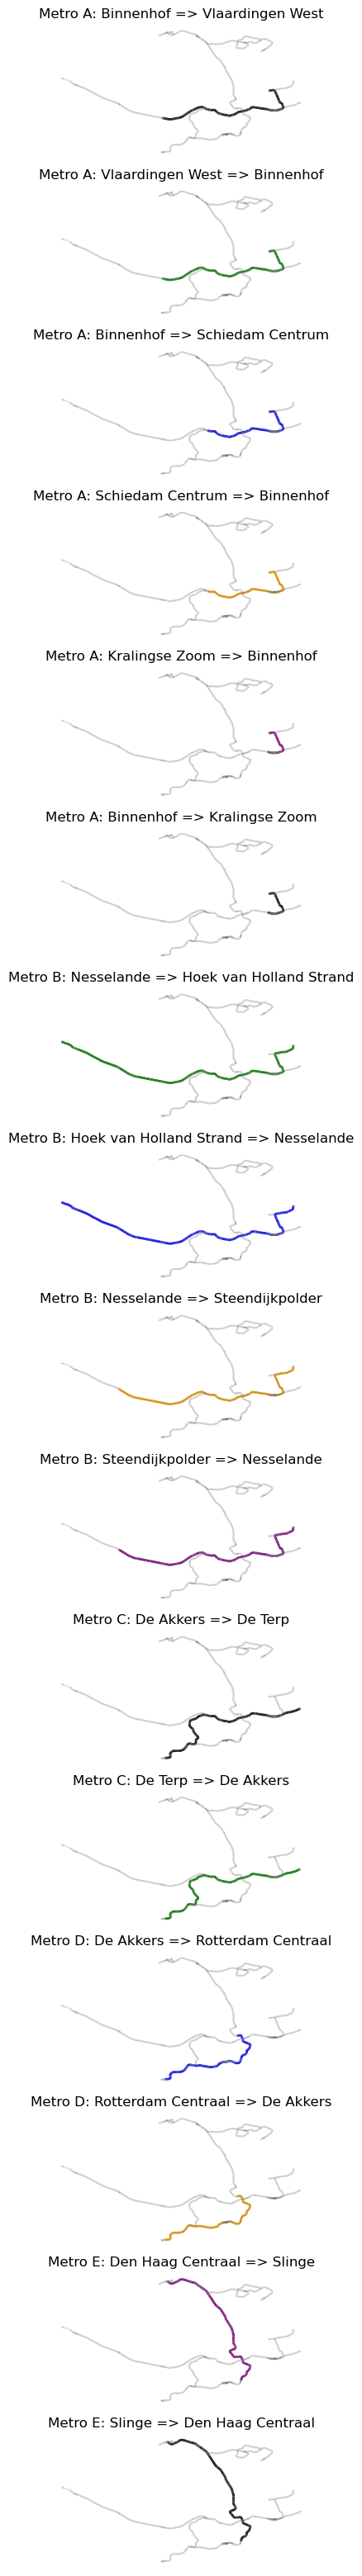

In [9]:
city_sub_order_route_dict, city_sub_shortest_path_pairs, city_sub_shortest_path_edges, city_sub_edges = metro(city_sub_stations, edges, nodes, city_sub_routes, city='Rotterdam')

In [10]:
selected_routes = ['Metro A: Binnenhof => Vlaardingen West','Metro A: Vlaardingen West => Binnenhof','Metro B: Nesselande => Hoek van Holland Strand','Metro B: Hoek van Holland Strand => Nesselande','Metro C: De Akkers => De Terp','Metro C: De Terp => De Akkers','Metro D: De Akkers => Rotterdam Centraal','Metro D: Rotterdam Centraal => De Akkers','Metro E: Den Haag Centraal => Slinge','Metro E: Slinge => Den Haag Centraal']

In [11]:
city_sub_order_route_dict = {key: city_sub_order_route_dict[key] for key in selected_routes}

In [12]:
city_sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_order_route_dict, city_sub_routes)

In [13]:
aggregation_functions = {
    'name': 'first',
    'geometry': 'first',
    'geo_x': 'first',
    'geo_y': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': (lambda x: ', '.join(x)),
    'route': 'first'
}

In [14]:
new_nodes = add_columns_to_nodes(city_sub_order_route_dict, aggregation_functions, nodes)

In [15]:
city_sub_shortest_path_edges = {key: city_sub_shortest_path_edges[key] for key in selected_routes}
city_sub_shortest_path_edges

{'Metro A: Binnenhof => Vlaardingen West':         osm_id                                           geometry     railway  \
 0    459077281  LINESTRING (4.3435659 51.9031818, 4.3433886 51...  light_rail   
 1    459077281  LINESTRING (4.3390156 51.9022441, 4.3381403 51...  light_rail   
 2    662480800  LINESTRING (4.3187193 51.9031456, 4.3173213 51...  light_rail   
 3    663473523  LINESTRING (4.3208563 51.9027244, 4.3187193 51...  light_rail   
 4    663473525  LINESTRING (4.3150875 51.9038216, 4.3157774 51...  light_rail   
 ..         ...                                                ...         ...   
 104  687533232  LINESTRING (4.5474841 51.9608884, 4.547574 51....  light_rail   
 105  687533233  LINESTRING (4.5472086 51.9610784, 4.5473829 51...  light_rail   
 106  207627814  LINESTRING (4.5356879 51.9602878, 4.5362277 51...  light_rail   
 107  493956404  LINESTRING (4.5390861 51.9608809, 4.5393034 51...  light_rail   
 108  687533230  LINESTRING (4.5372953 51.9605876, 4.539

In [16]:
city_sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_shortest_path_edges, city_sub_routes)

In [17]:
aggregation_functions = {
    'geometry': 'first',
    'count_weight': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': lambda x: ', '.join(x),
    'route': 'first'
}

In [18]:
new_edges = add_columns_to_edges(city_sub_shortest_path_edges, aggregation_functions, edges)

In [19]:
city_sub_path_s_e, city_sub_length_s_e, city_sub_short_path_edges,city_sub_start_end_points_coordinates_pairs,city_sub_start_end_nearest_id_pairs = transfer_shortest_path(s_e_coordinates, new_edges, new_nodes)

In [20]:
city_sub_distance_s_s_tuple, city_sub_distance_e_e_tuple = walking_linear_distance(city_sub_start_end_points_coordinates_pairs,city_sub_start_end_nearest_id_pairs, new_nodes)

In [21]:
city_sub_distance_s_s_tuple

191.9195413745947

In [22]:
city_sub_distance_e_e_tuple

123.84242356468518

In [23]:
choosesub_using_time_tuple = transfer_using_time(city_sub_short_path_edges, city_sub_distance_s_s_tuple, city_sub_distance_e_e_tuple)

In [24]:
choosesub_using_time_tuple

(0.1380181669114327, 8, 0.07486577392357674, 0.06315239298785598)

In [25]:
# plot_chosen_route(new_edges, city_sub_short_path_edges)

# Tram

In [26]:
city_tram_stations, tram_edges, tram_nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2741/2741 [00:00<00:00, 4201.05it/s]


In [27]:
city_tram_routes = city_tram_routes.loc[city_tram_routes.network == 'Rail Rotterdam']

In [28]:
city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

In [29]:
replacement_dict = {
    'Scheveningen, ': '',
    'Delft, ': '',
    'Den Haag, ': '',
    'Rotterdam, ': '',
    'Schiedam, ': '',
    'Nootdorp,': '',
    'Wateringen,': '',
    'Leidschendam,': '',
    'Vlaardingen, ': '',
    'Zoetermeer, ': '',
    'Barendrecht, ': '',
    'Beverwaard': 'P+R Beverwaard',
    'Molenlaan': 'Burg. Van Kempensingel',
    'Spangen': 'Spartastraat',
    'Lombardijen': 'Kreekhuizenlaan',
    'Woudestein': 'Burgemeester Oudlaan'  
    
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

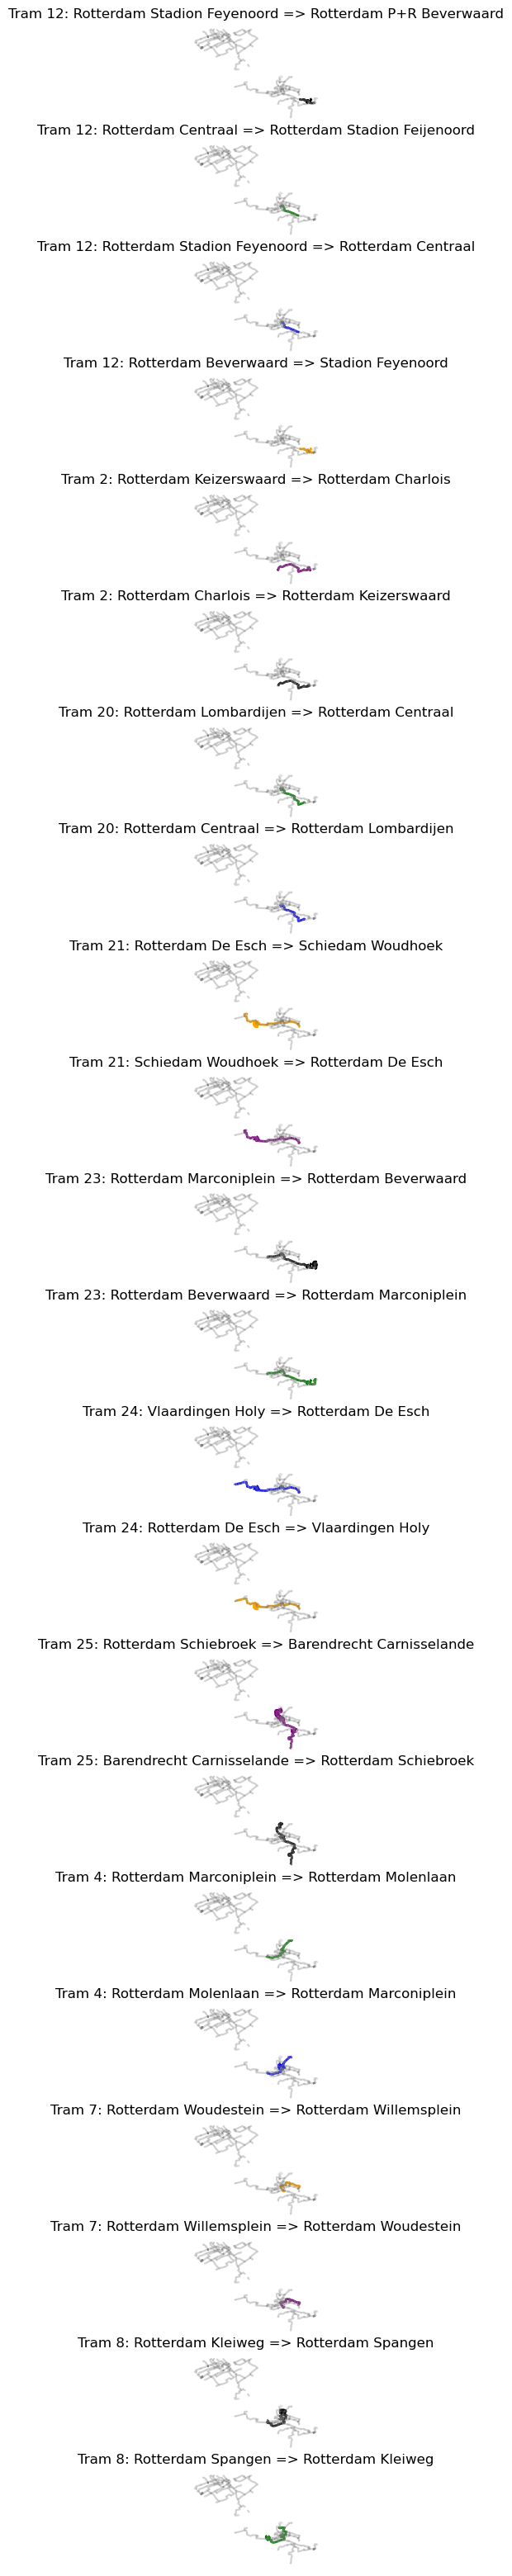

In [30]:
city_tram_order_route_dict, city_tram_shortest_path_pairs, city_tram_shortest_path_edges, city_tram_edges = tram(city_tram_stations, tram_edges, tram_nodes, city_tram_routes, city='Rotterdam')

In [31]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [32]:
aggregation_functions_nodes = {
    'name': 'first',
    'geometry': 'first',
    'geo_x': 'first',
    'geo_y': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': (lambda x: ', '.join(x)),
    'route': 'first'
}

In [33]:
tram_new_nodes = add_columns_to_nodes(city_tram_order_route_dict, aggregation_functions_nodes, tram_nodes)

In [34]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges, city_tram_routes)

In [35]:
aggregation_functions_edges = {
    'geometry': 'first',
    'count_weight': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': lambda x: ', '.join(x),
    'route': 'first'
}

In [36]:
tram_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,7468810,"LINESTRING (4.3525044 52.0194351, 4.3525079 52...",tram,None,0,0,1,158.395296,0.007920,158,"(0, 1)","(1, 0)"
1,7515447,"LINESTRING (4.4594295 51.9143185, 4.4595785 51...",tram,None,1,2,3,49.162139,0.002458,49,"(2, 3)","(3, 2)"
2,7523013,"LINESTRING (4.4864828 51.9251177, 4.4865356 51...",tram,None,2,4,2205,500.159544,0.025008,500,"(4, 2205)","(2205, 4)"
3,7523013,"LINESTRING (4.4865293 51.9295998, 4.4865357 51...",tram,None,3,2205,1943,367.949239,0.018397,367,"(2205, 1943)","(1943, 2205)"
4,7523013,"LINESTRING (4.4877652 51.9327348, 4.4878289 51...",tram,None,4,1943,5,61.030339,0.003052,61,"(1943, 5)","(5, 1943)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2736,1165340349,"LINESTRING (4.3711317 52.0036076, 4.3707433 52...",tram,None,2736,1712,1607,567.619135,0.028381,567,"(1712, 1607)","(1607, 1712)"
2737,1167929646,"LINESTRING (4.3060385 52.0727685, 4.3060624 52...",tram,None,2737,625,713,7.283439,0.000364,7,"(625, 713)","(713, 625)"
2738,1181094547,"LINESTRING (4.27116 52.091367, 4.2711445 52.09...",tram,None,2738,679,2370,14.408711,0.000720,14,"(679, 2370)","(2370, 679)"
2739,1181094547,"LINESTRING (4.2711324 52.0914954, 4.2710775 52...",tram,None,2739,2370,1713,323.756345,0.016188,323,"(2370, 1713)","(1713, 2370)"


In [37]:
tram_new_edges = add_columns_to_edges(city_tram_shortest_path_edges, aggregation_functions_edges, tram_edges)

In [38]:
tram_new_edges

,osm_id,geometry,railway,service,id_x,from_id,to_id,distance,time,weights,to_from,from_to,id_y,count_weight,route_name_list,ref,route
0,7468810,"LINESTRING (4.3525044 52.0194351, 4.3525079 52...",tram,None,0,0,1,158.395296,0.007920,158,"(0, 1)","(1, 0)",NaN,NaN,NaN,NaN,NaN
1,7515447,"LINESTRING (4.4594295 51.9143185, 4.4595785 51...",tram,None,1,2,3,49.162139,0.002458,49,"(2, 3)","(3, 2)",NaN,NaN,NaN,NaN,NaN
2,7523013,"LINESTRING (4.4864828 51.9251177, 4.4865356 51...",tram,None,2,4,2205,500.159544,0.025008,500,"(4, 2205)","(2205, 4)",2.0,1.0,Tram 7: Rotterdam Willemsplein => Rotterdam Wo...,"7, 8",tram
3,7523013,"LINESTRING (4.4865293 51.9295998, 4.4865357 51...",tram,None,3,2205,1943,367.949239,0.018397,367,"(2205, 1943)","(1943, 2205)",3.0,1.0,Tram 7: Rotterdam Willemsplein => Rotterdam Wo...,"7, 8",tram
4,7523013,"LINESTRING (4.4877652 51.9327348, 4.4878289 51...",tram,None,4,1943,5,61.030339,0.003052,61,"(1943, 5)","(5, 1943)",4.0,1.0,Tram 7: Rotterdam Willemsplein => Rotterdam Wo...,"7, 8",tram
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,1165340349,"LINESTRING (4.3711317 52.0036076, 4.3707433 52...",tram,None,2736,1712,1607,567.619135,0.028381,567,"(1712, 1607)","(1607, 1712)",NaN,NaN,NaN,NaN,NaN
2737,1167929646,"LINESTRING (4.3060385 52.0727685, 4.3060624 52...",tram,None,2737,625,713,7.283439,0.000364,7,"(625, 713)","(713, 625)",NaN,NaN,NaN,NaN,NaN
2738,1181094547,"LINESTRING (4.27116 52.091367, 4.2711445 52.09...",tram,None,2738,679,2370,14.408711,0.000720,14,"(679, 2370)","(2370, 679)",NaN,NaN,NaN,NaN,NaN
2739,1181094547,"LINESTRING (4.2711324 52.0914954, 4.2710775 52...",tram,None,2739,2370,1713,323.756345,0.016188,323,"(2370, 1713)","(1713, 2370)",NaN,NaN,NaN,NaN,NaN


In [39]:
tram_path_s_e, tram_length_s_e, tram_short_path_edges,tram_start_end_points_coordinates_pairs,tram_start_end_nearest_id_pairs = transfer_shortest_path(s_e_coordinates, tram_new_edges, tram_new_nodes)

In [40]:
tram_distance_s_s_tuple, tram_distance_e_e_tuple = walking_linear_distance(tram_start_end_points_coordinates_pairs,tram_start_end_nearest_id_pairs,tram_new_nodes)

In [41]:
tram_distance_s_s_tuple

40.347814677728834

In [42]:
tram_distance_e_e_tuple

40.290957403953165

In [43]:
chosentram_using_time_tuple = transfer_using_time( tram_short_path_edges,tram_distance_s_s_tuple, tram_distance_e_e_tuple)

In [44]:
chosentram_using_time_tuple

(0.09369479134476977, 6, 0.07756703692843338, 0.016127754416336397)

In [45]:
# plot_chosen_route(tram_new_edges, tram_short_path_edges)

# Compare

In [46]:
dict_fastest = compare_using_time_st(choosesub_using_time_tuple, new_edges, city_sub_short_path_edges, chosentram_using_time_tuple, tram_new_edges, tram_short_path_edges)

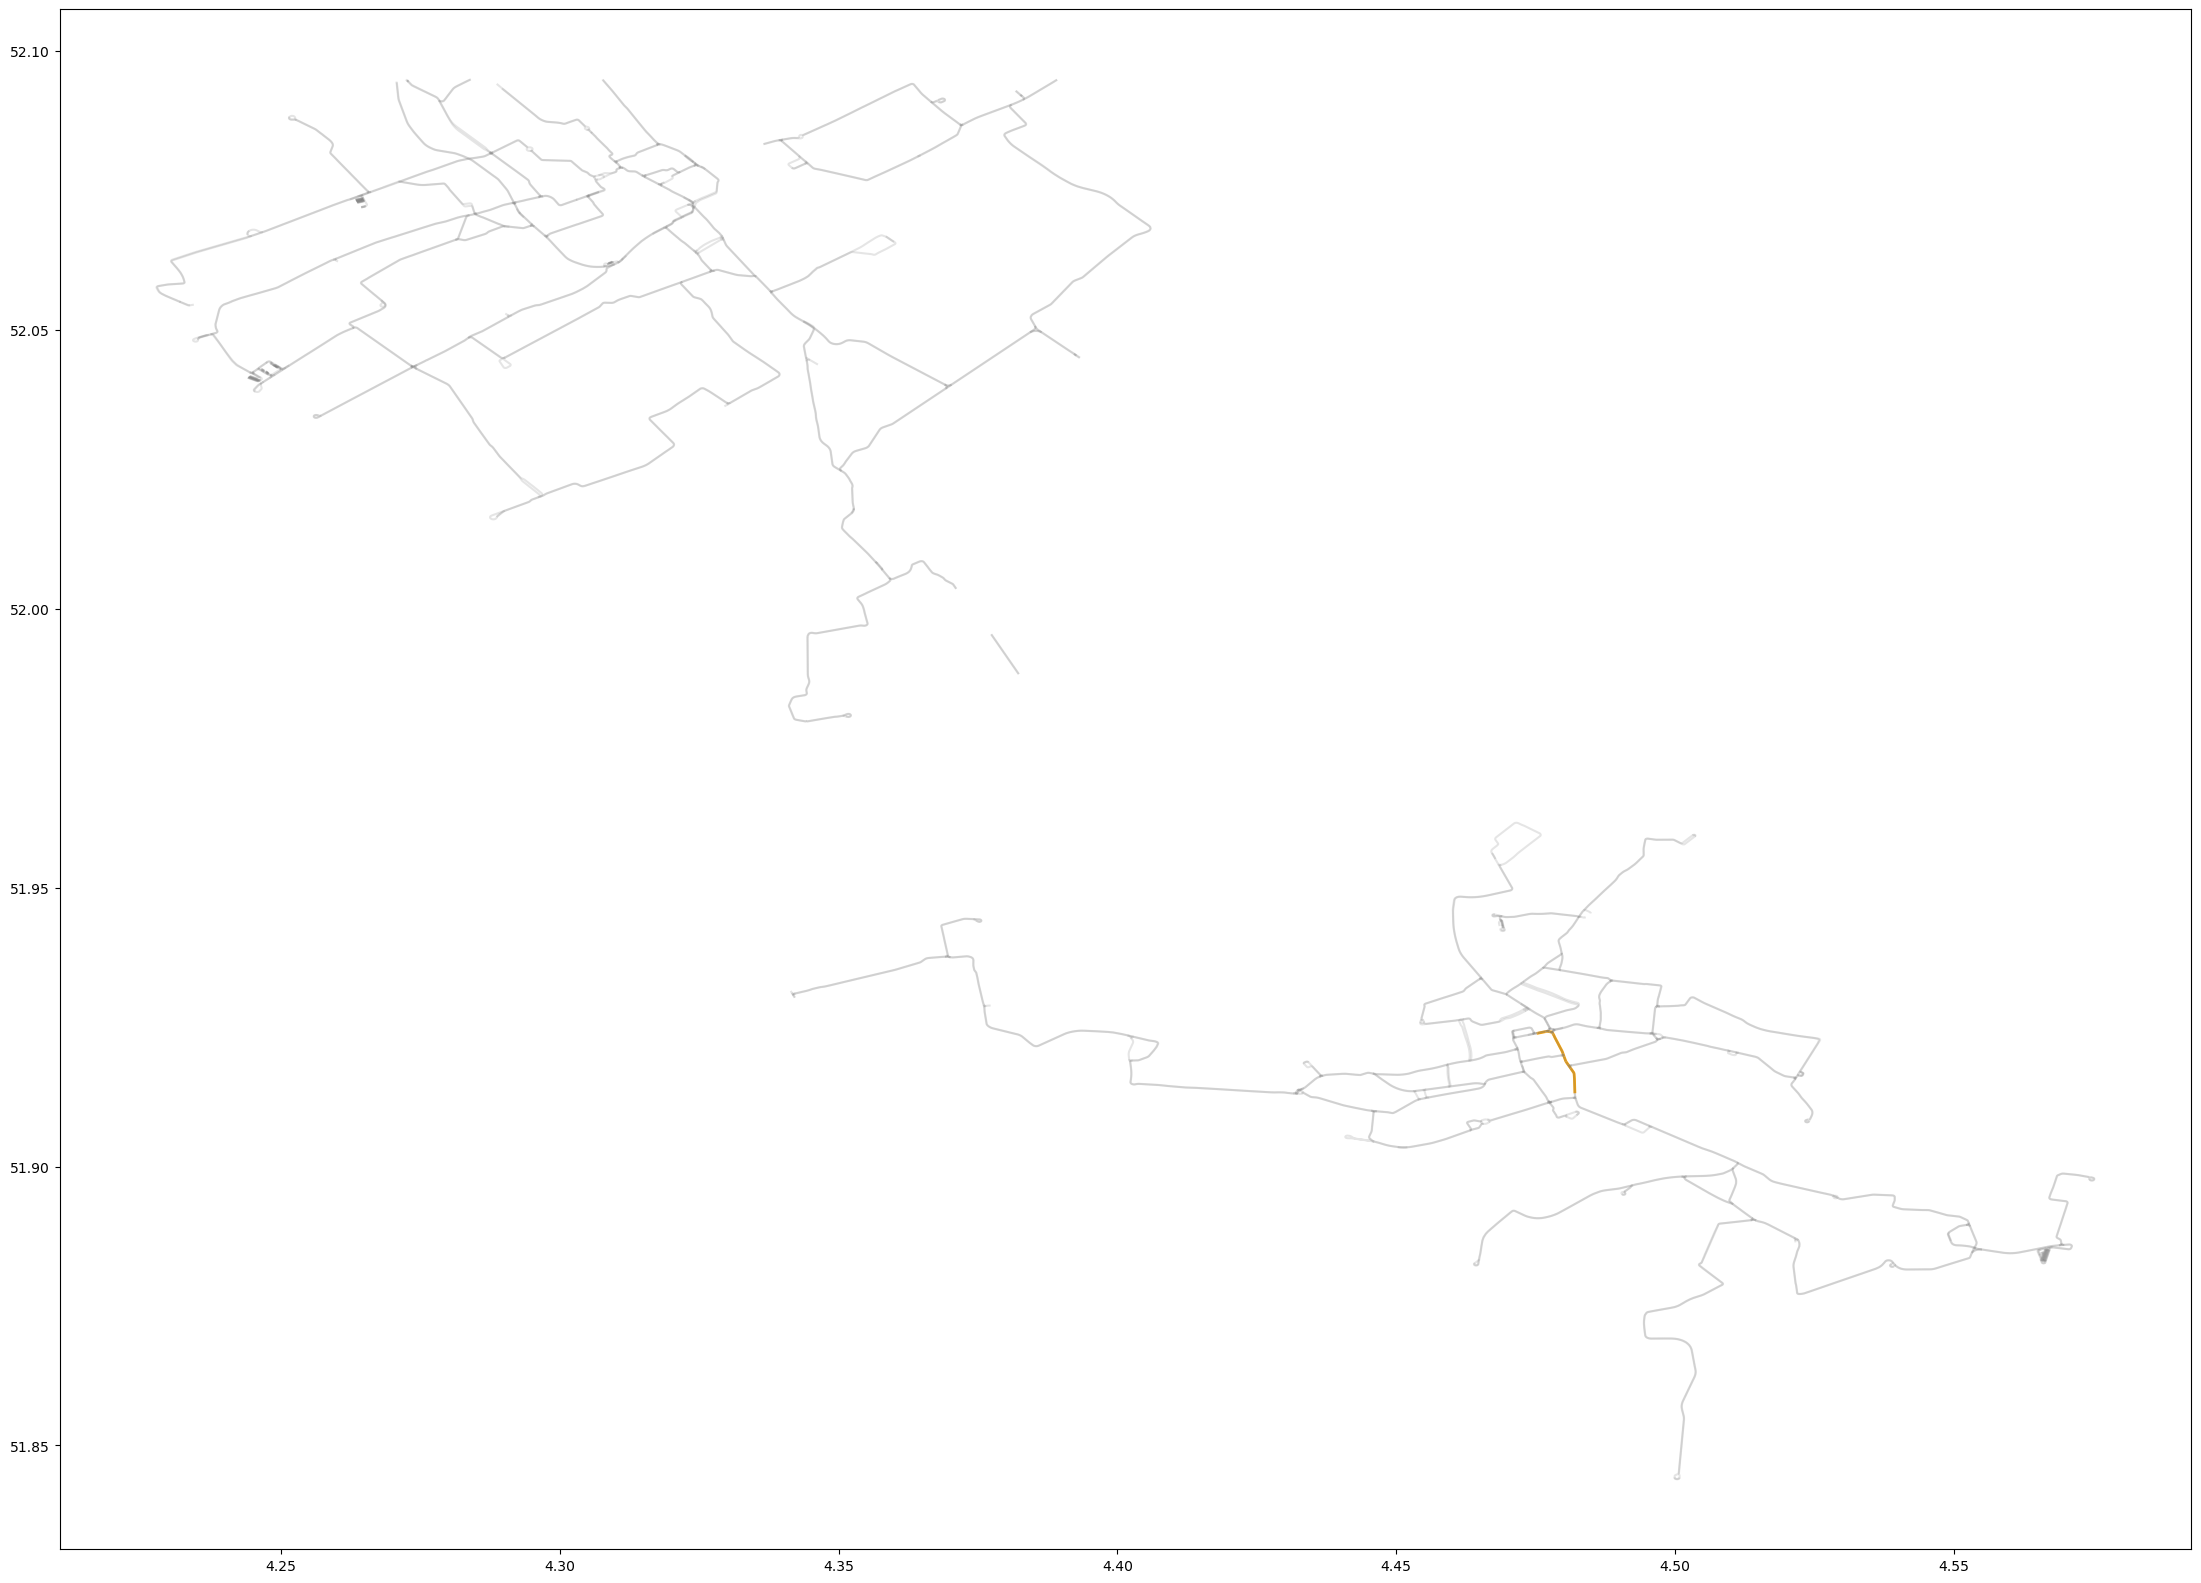

In [47]:
plot_chosen_route(dict_fastest)

# Bus

In [5]:
city_bus_stations, edges, nodes, city_bus_routes = prepare_bus(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████| 164083/164083 [00:36<00:00, 4514.03it/s]


In [6]:
city_bus_routes = city_bus_routes.loc[city_bus_routes.network == 'Bus Rotterdam']
city_bus_routes = city_bus_routes.loc[city_bus_routes.ref != '668']
city_bus_routes = city_bus_routes.loc[city_bus_routes.name != 'Bus 77: Rotterdam Zuidplein => Rotterdam Katendrecht']
city_bus_routes = city_bus_routes.loc[city_bus_routes.name != 'Bus 30: Capelle Schollevaar => Rotterdam Station Alexander']
city_bus_routes = city_bus_routes.loc[city_bus_routes.name != 'Bus 36: Rotterdam Station Alexander => Rotterdam Kralingse Zoom']
city_bus_routes = city_bus_routes.loc[city_bus_routes.name != 'Bus 547: Rotterdam Noordereiland => Rotterdam Noordereiland']
city_bus_routes = city_bus_routes.loc[city_bus_routes.name != 'Bus 607: Capelle Centrum => Rotterdam Capelsebrug']
city_bus_routes = city_bus_routes.loc[city_bus_routes.name != 'Bus 607: Rotterdam Capelsebrug => Capelle Centrum']
city_bus_routes = city_bus_routes.loc[city_bus_routes.name != 'Bus 98: Krimpen aan den IJssel Van Ostadelaan => Krimpen aan den IJssel => Krimpen aan den IJssel Van Ostadelaan']
city_bus_routes = city_bus_routes.loc[city_bus_routes.service != 'night'].reset_index(drop=True)

In [7]:
city_bus_routes, check_name = check_bus_routes(city_bus_stations, city_bus_routes)

In [8]:
city_bus_routes

,osm_id,route,to,name,ref,network,service,geometry
0,1689867,bus,"Schiedam, Station Schiedam Centrum",Bus 126: Maassluis West => Schiedam Centrum,126,Bus Rotterdam,None,"MULTILINESTRING ((4.23625 51.92607, 4.23621 51..."
1,383677,bus,"Maassluis, Station Maassluis West",Bus 126: Schiedam Centrum => Maassluis West,126,Bus Rotterdam,None,"MULTILINESTRING ((4.40907 51.92138, 4.40849 51..."
2,6377577,bus,"Slikkerveer, Dillenburgplein",Bus 140: Rotterdam Kralingse Zoom => Slikkerve...,140,Bus Rotterdam,None,"MULTILINESTRING ((4.53258 51.92183, 4.53272 51..."
3,6377578,bus,"Rotterdam, Kralingse Zoom",Bus 140: Slikkerveer Dillenburgplein => Rotter...,140,Bus Rotterdam,None,"MULTILINESTRING ((4.60505 51.88485, 4.60485 51..."
4,13206981,bus,"Slikkerveer, Dillenburgplein",Bus 142: Rotterdam Zuidplein => Slikkerveer Di...,142,Bus Rotterdam,None,"MULTILINESTRING ((4.48914 51.88767, 4.48900 51..."
...,...,...,...,...,...,...,...,...
103,6361960,bus,"Rotterdam, Keizerswaard",Bus 83: Rotterdam Kralingse Zoom => Rotterdam ...,83,Bus Rotterdam,None,"MULTILINESTRING ((4.53267 51.92181, 4.53280 51..."
104,6308492,bus,"Rotterdam, Zuidplein",Bus 84: Barendrecht Station => Rotterdam Zuidp...,84,Bus Rotterdam,None,"MULTILINESTRING ((4.55183 51.85476, 4.55183 51..."
105,6308493,bus,"Barendrecht, Station",Bus 84: Rotterdam Zuidplein => Barendrecht Sta...,84,Bus Rotterdam,None,"MULTILINESTRING ((4.48911 51.88761, 4.48897 51..."
106,382710,bus,"Rotterdam, Capelsebrug Metro",Bus 96: Rotterdam Capelsebrug => Krimpen aan d...,96,Bus Rotterdam,None,"MULTILINESTRING ((4.55790 51.92115, 4.55759 51..."


In [9]:
replacement_dict = {
    'Slikkerveer, Sporttunnel': 'Ridderkerk, Sporttunnel', # Sporttunnel
    'Dordrecht, Station': 'Dordrecht, Centraal Station',
    'Lansingerland-Zoetermeer Zuidplein': 'Station Lansingerland-Zoetermeer Zuidplein',
    'Ridderkerk, Donkersloot': 'Ridderkerk, Groenendijk', # Groenendijk
        
    'Rotterdam, Caïrostraat': 'Rotterdam, Marconiplein',
    'Schiedam, Nieuwe Maasstraat': 'Schiedam, Station Schiedam Centrum',
    'Rotterdam, Meeuwenstaart': 'Rotterdam, Sleephellingstraat Zuid', # 'Rotterdam, Station Blaak'   'Station Blaak'
    'Barendrecht, Station NS': 'Barendrecht, Station Barendrecht',
    
    'Rotterdam, Damstraat': 'Damstraat',
    'Rotterdam, Metro Pernis': 'Pernis Rotterdam, Pernis Metro', # Pernis Metro
    # 'Rotterdam, SS Rotterdam': 'SS Rotterdam',
    'Barendrecht, Station': 'Barendrecht, Station Barendrecht',
    'Rotterdam, Capelsebrug': 'Rotterdam, Capelsebrug Hoog',
    'Rotterdam, Zuidplein': 'Rotterdam, Zuidplein Hoog',


    'Poortugaal Metro': 'Poortugaal, Poortugaal Metro'
    
}


city_bus_stations, city_bus_routes, check_name = recheck_bus_routes(replacement_dict, city_bus_stations, city_bus_routes)

In [10]:
replacement_dict = {

    'Barendrecht, Station Barendrecht Barendrecht': 'Barendrecht, Station Barendrecht',
    'Rotterdam, Capelsebrug Hoog Metro': 'Rotterdam, Capelsebrug Metro', 
    'Rotterdam, Zuidplein Hoog Hoog': 'Rotterdam, Zuidplein Hoog',
    'Poortugaal, Poortugaal, Poortugaal Metro': 'Poortugaal, Poortugaal Metro'
    
    
}
city_bus_stations, city_bus_routes, check_name = recheck_bus_routes(replacement_dict, city_bus_stations, city_bus_routes)

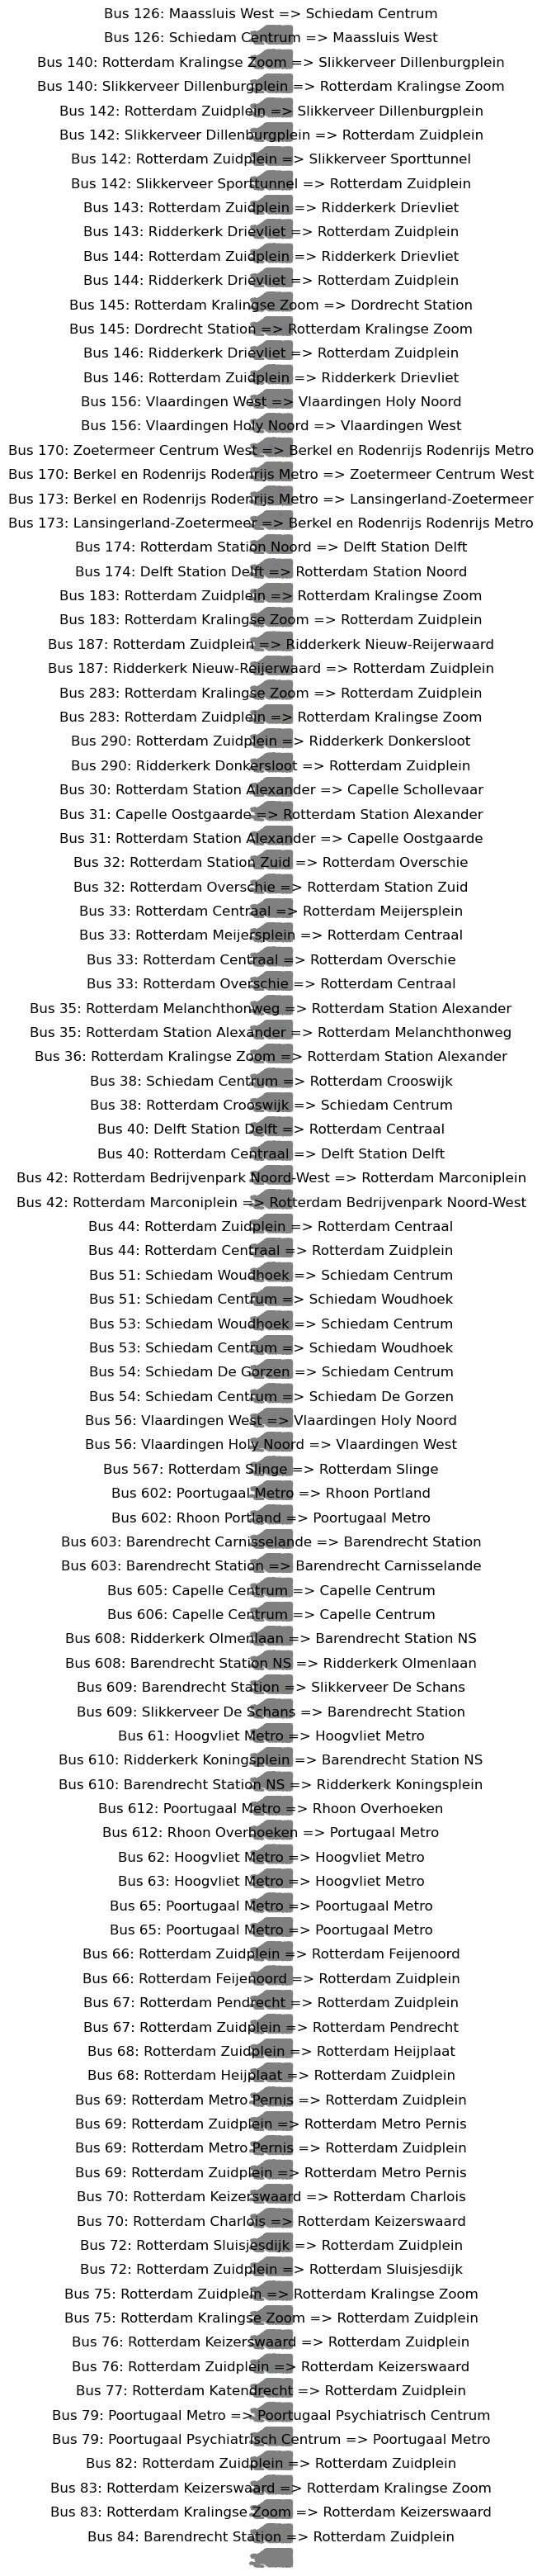

In [11]:
city_bus_order_route_dict, city_bus_shortest_path_pairs, city_bus_shortest_path_edges, city_bus_edges = bus(city_bus_stations, edges, nodes, city_bus_routes, city='Rotterdam')

In [12]:
city_bus_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_bus_order_route_dict, city_bus_routes)

In [13]:
aggregation_functions = {
    'name': 'first',
    'geometry': 'first',
    'geo_x': 'first',
    'geo_y': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': (lambda x: ', '.join(x)),
    'route': 'first'
}

In [14]:
city_bus_new_nodes = add_columns_to_nodes(city_bus_order_route_dict, aggregation_functions, nodes)

In [15]:
city_bus_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_bus_shortest_path_edges, city_bus_routes)

In [16]:
aggregation_functions = {
    'geometry': 'first',
    'count_weight': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': lambda x: ', '.join(x),
    'route': 'first'
}

In [17]:
city_bus_new_edges = add_columns_to_edges(city_bus_shortest_path_edges, aggregation_functions, edges)

In [18]:
city_bus_path_s_e, city_bus_length_s_e, city_bus_short_path_edges, city_bus_start_end_points_coordinates_pairs, city_bus_start_end_nearest_id_pairs = transfer_shortest_path(s_e_coordinates, city_bus_new_edges, city_bus_new_nodes)

NetworkXNoPath: No path between 157302 and 158583.

In [ ]:
city_bus_distance_s_s_tuple, city_bus_distance_e_e_tuple = walking_linear_distance(city_bus_start_end_points_coordinates_pairs,city_bus_start_end_nearest_id_pairs, city_bus_new_nodes)

In [ ]:
city_bus_distance_s_s_tuple

In [ ]:
city_bus_distance_e_e_tuple

In [ ]:
choosebus_using_time_tuple = transfer_using_time(city_bus_short_path_edges, city_bus_distance_s_s_tuple, city_bus_distance_e_e_tuple)

In [ ]:
choosebus_using_time_tuple

In [ ]:
plot_chosen_route(city_bus_new_edges, city_bus_short_path_edges)